In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

pd.set_option('display.max_rows', None)

PATH="data/WiGLE_Backup.db"
PATH_MAP="data/cve-map.json"
net = "network"
loc = "location"
WiWiFi="wigle_wifi"
WiBL="wigle_blue"
cve0="cve_basic"
cve1="cve_metrics_2"
cve2="cve_metrics_3"
cve3="cve_weaknesses"

In [8]:
# types
vulner_detail=[]
def vulner_type(keywords):
    con=sqlite3.connect(PATH)
    cur=con.cursor()
    
    types_dict_v2={"C":0,"I":0,"A":0}
    
    sql="select vectorString from {} where cve0.keywords='{}' and {}.id ={}.id".format(cve1,keywords,cve0,cve1)
    vecs=cur.execute(sql).fetchall()
    
    for vec in vecs:
        vs=vec.split('/')
        for i in range(1,len(vs)):
            if vs.split(":")[1]!='N':
                types_dict_v2[vs.split(":")[0]]+=1
                
    
    types_dict_v3={"C":0,"I":0,"A":0}
    
    sql="select vectorString from {} where cve0.keywords='{}' and {}.id ={}.id".format(cve2, keywords,cve0,cve2)
    vecs=cur.execute(sql).fetchall()
    
    for vec in vecs:
        vs=vec.split('/')
        for i in range(6,len(vs)):
            if vs.split(":")[1]!='N':
                types_dict_v3[vs.split(":")[0]]+=1
    con.close()
    return [types_dict_v2,type_dict_v3]


def vulner_detailed_types(keywords):
    con=sqlite3.connect(PATH)
    cur=con.cursor()
    
#     cwe_dict={
#         "CWE-119":,
#         'CWE-121':,
#         'CWE-20':,
#         'CWE-200':,
#         'CWE-264':,
#         'CWE-287':,
#         'CWE-310':,
#         'CWE-327':,
#         'CWE-352':,
#         'CWE-400':,
#         'CWE-494':,
#         'CWE-522':,
#         'CWE-74':,
#         'CWE-78':,
#         'CWE-787':,
#         'CWE-79':,
#         'CWE-798':,
#         'CWE-862':,
#         'CWE-89':,
#         'NVD-CWE-Other':,
#         'NVD-CWE-noinfo':
#     }
    sql="select description_value count(*) from {},{} where cve0.keywords='{}' and {}.id ={}.id group by description_value".format(cve3,cve0,keywords,cve3,cve0)
    rts=con.execute(sql).fetchall
    
    rts_weak={'others':[]}
    
    for rt in rts:
        cwe=rt[0]
        #cwe_type=cwe_dict.get[cwe]
        
        if cwe_type==None:
            rts_weak['others'].append(cwe)
        elif rts_weak.get(cwe_type)==None:
            rts_weak[cwe_type]=1
        else:
            rts_weak[cwe_type]+=1
    
    print(rte_weak)
    return rts_weak
    
def vulner_risk_level(keywords):
    con=sqlite3.connect(PATH)
    cur=con.cursor()
    
    sql="select impactScore,count(*) from {} where {}.keywords='{}' and {}.id ={}.id gourp by impactScore".format(cve1,cve0,keywords,cve0,cve1)
    rts=cur.execute(sql).fetechall()
    print(rts)
    
    sql="select impactScore,count(*) from {} where {}keywords='{}' and cve0.keywords='{}' and {}.id ={}.id gourp by impactScore".format(cve2,cve0,keywords,cve0,cve2)
    rts=cur.execute(sql).fetechall()
    print(rts)
    
    con.close()
    
def vulner_bug_fix(keywords):
    con=sqlite3.connect(PATH)
    cur=con.cursor()
    
    con.close()
    
    pass
    

# Vendors

In [52]:
def vendor(df,title):
    other_count = df.loc[df.index > 6, 'count(*)'].sum()
    df.loc[6, 'OrganizationName'] = 'Other'
    df.loc[6, 'count(*)'] = other_count
    df = df.loc[df.index <= 6]
    
    plt.figure(figsize=(8, 8))
    plt.pie(df['count(*)'],autopct='%1.1f%%', textprops={"fontsize": 14}, labels=df['OrganizationName'])
    plt.show()
    

                 OrganizationName  count(*)
0              Bang & Olufsen A/S      2784
1     Samsung Electronics Co.,Ltd      2476
2                     Apple, Inc.      1888
3     Rayson Technology Co., Ltd.      1199
4                       Teltonika      1191
...                           ...       ...
1928                          3CX         1
1929       1394 Trade Association         1
1930     10NET COMMUNICATIONS/DCA         1
1931         Vanderlande APC inc.         1
1932                     BST GmbH         1

[1933 rows x 2 columns]
These devices belong to 1933 companies


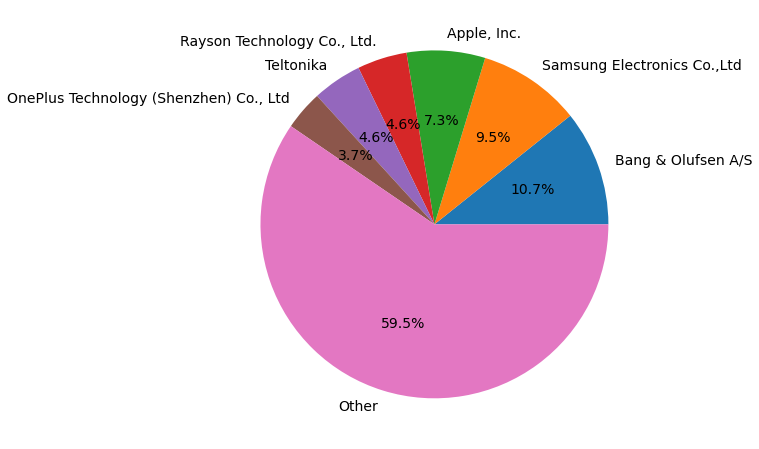

In [54]:
con=sqlite3.connect(PATH)
cur=con.cursor()

query = """
        SELECT vendor.OrganizationName, count(*)
        FROM vendor
        JOIN (
            SELECT bssid 
            FROM network 
            WHERE type = 'B' or type = 'E'
            UNION ALL 
            SELECT netid 
            FROM wigle_blue
        ) AS network_blue ON network_blue.bssid = vendor.mac
        GROUP BY vendor.OrganizationName
        ORDER BY count(*) DESC
        """
df = pd.read_sql_query(query, con)
df['OrganizationName'] = df['OrganizationName'].str.replace('\n', '')
print(df)
print('These devices belong to {} companies'.format(df.shape[0]))

vendor(df,"Bluetooth Vendor Distribution")

# Version

In [9]:
con=sqlite3.connect(PATH)
cur=con.cursor()
query = """
        select count(*)
        from (
        SELECT bssid
                from network
                where network.type = 'B' 
                UNION ALL
                select netid as bssid
                from wigle_blue
                where wigle_blue.type='BT')
        """
df_B = pd.read_sql_query(query, con)
print('These devices belong to {} companies'.format(df_B['count(*)']))

query = """
        select count(*)
        from (
        SELECT bssid
                from network
                where network.type = 'E' 
                UNION ALL
                select netid as bssid
                from wigle_blue
                where wigle_blue.type='BLE')
        """
df_E = pd.read_sql_query(query, con)
print('These devices belong to {} companies'.format(df_E['count(*)']))

df=pd.concat([df_B, df_E])
print(df)
con.close()



These devices belong to 0    72660
Name: count(*), dtype: int64 companies
These devices belong to 0    265970
Name: count(*), dtype: int64 companies
   count(*)
0     72660
0    265970


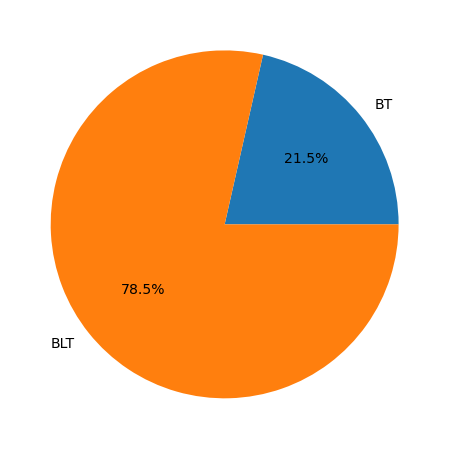

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(df['count(*)'],autopct='%1.1f%%', textprops={"fontsize": 14}, labels=['BT','BLT'])
plt.show()

# Device type

In [4]:
con=sqlite3.connect(PATH)
cur=con.cursor()

sql="""
        select capabilities, count(*)
        from (
            select capabilities from network where type!='W'
            UNION ALL
            SELECT capabilities from wigle_blue
        ) 
        GROUP by capabilities
    """
df=pd.read_sql_query(sql, con)
print("There are {} types of capabilities\n".format(df.shape[0]),df)
con.close()

#df['capabilities']=df['capabilities'].replace([";10", "', '10']","', '12']"],'')

df['capabilities']=df['capabilities'].str.replace(";10",'')
df['capabilities']=df['capabilities'].str.replace("', '10']",'')
df['capabilities']=df['capabilities'].str.replace("\['",'')
df['capabilities']=df['capabilities'].str.replace("', '12']",'')
df['capabilities']=df['capabilities'].str.replace("']",'')

pd.set_option('display.max_rows', None)
print(df)

print("combine")

mask = df['capabilities'].str.contains('null|Uncategorized|Misc|\[]')

# add new column 'c' with value 'c' for rows containing 'n' in column 'A'
df.loc[mask, 'capabilities'] = 'Uncategorized'

grouped_df = df.groupby(df['capabilities'].str.split(';').str[0]).sum().sort_values(by='count(*)', ascending=False).reset_index()

# rename the 'capabilities' column
grouped_df = grouped_df.rename(columns={'capabilities': 'capabilities'})
print(grouped_df)

all_capabilities=grouped_df["capabilities"]

There are 74 types of capabilities
                                    capabilities  count(*)
0                                        A/V;10         1
1                                  Car Audio;10        21
2                                  Cellphone;10        20
3                                   Computer;10        60
4                             Cordless Phone;10         4
5                                    Desktop;10        50
6                               Display/Speaker         2
7                            Display/Speaker;10       559
8                                  Handsfree;10       755
9                                    Headphones         3
10                                Headphones;10        62
11                            Health Display;10         4
12                                      HiFi;10        11
13                                       Laptop         2
14                                    Laptop;10       657
15                                  

                               capabilities  count(*)
0                             Uncategorized    396902
1                                 Handsfree      3672
2                                Smartphone      2013
3                                     [BLE]      1977
4                           Display/Speaker      1100
5                                    Laptop      1052
6                                   Speaker       186
7                                 Cellphone       149
8                                    Settop       142
9                                Headphones       136
10                                  Desktop       112
11                                    Watch       101
12                                 Computer        92
13                                     HiFi        69
14                                 CarAudio        58
15                                      PDA        47
16                                      A/V        27
17                          

      capabilities  count(*)
0    Uncategorized    396902
1        Handsfree      3672
2       Smartphone      2013
3            [BLE]      1977
4  Display/Speaker      1100
5           Laptop      1052
6            Other      1028


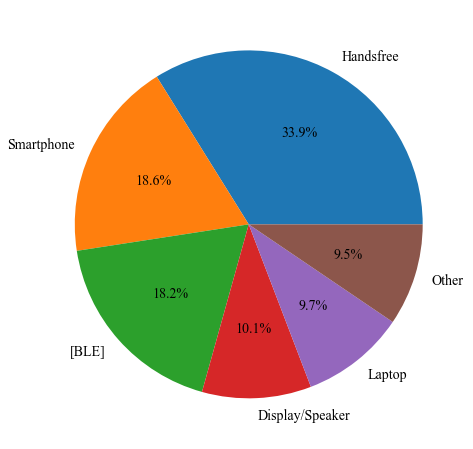

In [5]:
# print the resulting DataFrame
#print(grouped_df)
grNum=6
other_count = grouped_df.loc[grouped_df.index > grNum, 'count(*)'].sum()
grouped_df.loc[grNum, 'capabilities'] = 'Other'
grouped_df.loc[grNum, 'count(*)'] = other_count
grouped_df = grouped_df.loc[grouped_df.index <= grNum]
print(grouped_df)
plt.figure(figsize=(8, 8))
plt.pie(grouped_df["count(*)"][1:],labels=grouped_df["capabilities"][1:],autopct='%1.1f%%', textprops={"fontsize": 14})
plt.show()

# devices - vulnerabilities

In [16]:
ULW_P=["EUROPE","BEIJING","SHENZHEN","AMERICA","SICHUAN","HUI","ZHOU","Hong","KONG","SHANGHAI","ASIA","CH","USA","BELGIUM",
       "ZHUHAI","GUANGZHOU"]# useless word-place
ULW_S=["COMPUTER","SYSTEMS","CO","LTD","LIMITED","CORPORATION","CORP","COMMUNCATIONS","COMMUNICATION","COMMUNICATIONS","ELECTRONIC","ELECTRONICS",
       "NETWORK","INC","LLC","COMPANY","INTERNATIONAL","WIRELESS","DATA","MEDICAL","AG","Electric","NETWORKING","ELECTRIC",
       "SRO","BV","SYS","INDUSTRIALS","INDUSTRIAL","DEVICE","DEVICES","COMM","TECHNOLOGY","TECHNOLOGIES","TECH","COLTD","A/S","DELIVERY","NV",
       "NETWORKS","APPLICATIONS","OF","APS","GROUP","IND","DEVELOPMENT","AS","AB","OY","IOT","INNOTEK","GMBH","AUDIOVISUELLES",
       "MARKETING","UND","COMPUTERSYSTEME","MACHINE","ELECTRO","MECHANICS","MOBILE","SOFTWARE","DIGITAL","TECHLTD","INFORMATION",
      "AUTOMOTIVE","CORPORATE","ENTERPRISE","LABORATORY","LABORATORIES"] # useless word-suffix
def clean_name(vendors):
    vens=[]
    vendors=list(vendors)
 
    for vendor in vendors:
        rt=vendor.replace(",","").replace(".","").replace("\n","").replace("，","").replace("'","")
        rt_s=rt.split(" ")
        if rt_s[0]=="Harman/Becker":
            name=["Harman"]
        elif rt_s[0]=="Nokia":
            name=["Nokia"]
        else:
            name=[r for r in rt_s if r.upper() not in ULW_P and r.upper() not in ULW_S and "(" not in r and ")" not in r]
        #print(name)
        if name!=[]:
            vens.append(name[0].lower())
   
    return vens

In [17]:
all_capabilities

0                               Uncategorized
1                                   Handsfree
2                                  Smartphone
3                                       [BLE]
4                             Display/Speaker
5                                      Laptop
6                                       Other
7                                   Cellphone
8                                      Settop
9                                  Headphones
10                                    Desktop
11                                      Watch
12                                   Computer
13                                       HiFi
14                                   CarAudio
15                                        PDA
16                                        A/V
17                                  Car Audio
18                                       Palm
19                                    Monitor
20    [WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS][WPS]
21                              Co

In [18]:
con=sqlite3.connect(PATH)
cur=con.cursor()

sql="""SELECT DISTINCT capabilities, vendor.OrganizationName,count(*)
        FROM vendor,(
            SELECT bssid as netid, capabilities
            FROM network 
            WHERE type = 'B' or type = 'E'
            UNION ALL 
            SELECT netid,capabilities
            FROM wigle_blue
        ) AS network_blue
        WHERE network_blue.netid = vendor.mac
        GROUP BY capabilities, vendor.OrganizationName
        """
df=pd.read_sql_query(sql, con)
#display(df)
print("---------","clean capabilities","-----------")
for index, row in df.iterrows():
    for capability in all_capabilities:
        print
        if capability in row['capabilities']:
            if capability=='Car Audio':
                capability='CarAudio'
            if capability=='Health Display':
                capability='HealthDisplay'
            if "Wearable" in capability:
                capability="Wearable"
            df.at[index,'capabilities']=capability
            
            continue
display(df)

--------- clean capabilities -----------


capabilities  \
0                                    A/V   
1                               CarAudio   
2                               CarAudio   
3                               CarAudio   
4                               CarAudio   
5                               CarAudio   
6                              Cellphone   
7                              Cellphone   
8                              Cellphone   
9                              Cellphone   
10                             Cellphone   
11                             Cellphone   
12                             Cellphone   
13                             Cellphone   
14                             Cellphone   
15                             Cellphone   
16                             Cellphone   
17                              Computer   
18                              Computer   
19                              Computer   
20                              Computer   
21                              Computer   
22                              Computer   
23                              Computer   
24                              Computer   
25                              Computer   
26                                 Phone   
27                               Desktop   
28                               Desktop   
29                               Desktop   
30                               Desktop   
31                       Display/Speaker   
32                       Display/Speaker   
33                       Display/Speaker   
34                       Display/Speaker   
35                       Display/Speaker   
36                       Display/Speaker   
37                       Display/Speaker   
38                       Display/Speaker   
39                       Display/Speaker   
40                       Display/Speaker   
41                       Display/Speaker   
42                       Display/Speaker   
43                       Display/Speaker   
44                       Display/Speaker   
45                       Display/Speaker   
46                       Display/Speaker   
47                       Display/Speaker   
48                       Display/Speaker   
49                       Display/Speaker   
50                       Display/Speaker   
51                             Handsfree   
52                             Handsfree   
53                             Handsfree   
54                             Handsfree   
55                             Handsfree   
56                             Handsfree   
57                             Handsfree   
58                             Handsfree   
59                             Handsfree   
60                             Handsfree   
61                             Handsfree   
62                             Handsfree   
63                             Handsfree   
64                             Handsfree   
65                             Handsfree   
66                             Handsfree   
67                             Handsfree   
68                             Handsfree   
69                             Handsfree   
70                             Handsfree   
71                             Handsfree   
72                             Handsfree   
73                             Handsfree   
74                             Handsfree   
75                             Handsfree   
76                             Handsfree   
77                             Handsfree   
78                             Handsfree   
79                             Handsfree   
80                             Handsfree   
81                             Handsfree   
82                             Handsfree   
83                             Handsfree   
84                             Handsfree   
85                             Handsfree   
86                             Handsfree   
87                             Handsfree   
88                             Handsfree   
89                             Handsfree   
90                      

In [20]:
grouped = df.groupby('capabilities')
capa_vendor={}
for cap, group_df in grouped:
    print(f"Capabilities: {cap}")
    group_list = group_df[['OrganizationName', 'count(*)']].apply(lambda x: {'OrganizationName': x['OrganizationName'], 'count': x['count(*)']}, axis=1).tolist()
    sorted_group = sorted(group_list, key=lambda x: x['count'], reverse=True)
    capa_vendor[cap]=sorted_group
    #print(sorted_group)
    print("-------")
print(capa_vendor)

Capabilities: A/V
-------
Capabilities: CarAudio
-------
Capabilities: Cellphone
-------
Capabilities: Computer
-------
Capabilities: Desktop
-------
Capabilities: Display/Speaker
-------
Capabilities: Handsfree
-------
Capabilities: Headphones
-------
Capabilities: HealthDisplay
-------
Capabilities: HiFi
-------
Capabilities: Laptop
-------
Capabilities: Misc
-------
Capabilities: Misc;10
-------
Capabilities: Monitor
-------
Capabilities: PDA
-------
Capabilities: Palm
-------
Capabilities: Phone
-------
Capabilities: Pulse
-------
Capabilities: Robot
-------
Capabilities: Server
-------
Capabilities: Settop
-------
Capabilities: Smartphone
-------
Capabilities: Speaker;10
-------
Capabilities: Toy
-------
Capabilities: Uncategorized
-------
Capabilities: Watch
-------
Capabilities: Wearable
-------
Capabilities: ['Misc', '10']
-------
Capabilities: ['Misc']
-------
Capabilities: ['Misc[BT]']
-------
Capabilities: ['Misc[LE]']
-------
Capabilities: ['Speaker', '10']
-------
Capabili

In [21]:
"""
find those cve of a vendor which is used the most
"""
MAX_SHOWN_VENDOR=8-1
capa_cve={}
overview=pd.DataFrame()
for key in capa_vendor.keys():
    print("collecting {}...".format(key))
    
    #collect all the vendor names of a devices
    vendors=[x['OrganizationName'] for x in capa_vendor[key]]
    print(vendors)
    seen=set()
    unique_vendors=[]
    for vendor in vendors:
        if vendor not in seen:
            unique_vendors.append(vendor)
            seen.add(vendor)
    vendors=clean_name(unique_vendors)
    print(vendors)
    rts={}
    for i in range(len(vendors)):
        # collect all the severity and weakness according to cve_metrics_2
        sql="""SELECT baseSeverity, cve_weaknesses.description_value,vulnStatus,published
                from cve_metrics_2,cve_weaknesses,(
                SELECT id,vulnStatus,published from cve_basic where keywords='{}'
                )AS basic
                WHERE basic.id=cve_metrics_2.id and cve_weaknesses.id=basic.id""".format(vendors[i])
        df_vendor=pd.read_sql_query(sql, con)
        rts[vendors[i]]=df_vendor
        print(rts)
        if i>=MAX_SHOWN_VENDOR:
            break
        overview=pd.concat([overview,df_vendor])
    capa_cve[key]=rts

collecting A/V...
['Sunitec Enterprise Co.,Ltd\n', 'Imagination Technologies Ltd\n', 'LG Innotek\n', 'Ezurio Ltd\n', 'nFore Technology Inc.\n', 'Sunitec Enterprise Co.,Ltd\n']
['sunitec', 'imagination', 'lg', 'ezurio', 'nfore']
{'sunitec': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
{'sunitec': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'imagination': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
{'sunitec': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'imagination': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'lg':    baseSeverity description_value vulnStatus                published
0          HIGH           CWE-494   Analyzed  2020-03-23T16:15:17.860
1          HIGH           CWE-494   Analyzed  2020-03-23T16:15:17.860
2        MEDIUM          

Index: []}
collecting Cellphone...
['ARRIS Group, Inc.\n', 'Doro AB\n', 'MOTOROLA\n', 'Nokia Danmark A/S\n', 'Continental Automotive Systems Inc.\n', 'Sony Corporation\n', 'Microsoft Corporation\n', 'HMD Global Oy\n', 'HMD Global Oy\n', 'Nokia Corporation\n', 'Murata Manufacturing Co., Ltd.\n', 'ARRIS Group, Inc.\n', 'Nokia Corporation\n', 'Nokia Danmark A/S\n', 'Samsung Electronics Co.,Ltd\n', 'EMPORIA TELECOM Produktions- und VertriebsgesmbH & Co KG\n', 'Microsoft Mobile Oy\n', 'Mobiwire Mobiles (NingBo) Co., LTD\n', 'Murata Manufacturing Co., Ltd.\n', 'SIMCom Wireless Solutions Co.,Ltd.\n', 'Samsung Electronics Co.,Ltd\n', 'Texas Instruments\n', 'RTX Telecom A/S\n']
['arris', 'doro', 'motorola', 'nokia', 'continental', 'sony', 'microsoft', 'hmd', 'nokia', 'murata', 'samsung', 'emporia', 'microsoft', 'mobiwire', 'simcom', 'texas', 'rtx']
{'arris':    baseSeverity description_value vulnStatus                published
0          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.81

{'apple': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'intel':    baseSeverity description_value vulnStatus                published
0          HIGH            CWE-20   Modified  2021-12-10T10:15:09.143
1          HIGH           CWE-400   Modified  2021-12-10T10:15:09.143
2          HIGH           CWE-502   Modified  2021-12-10T10:15:09.143
3          HIGH           CWE-917   Modified  2021-12-10T10:15:09.143
4          HIGH            CWE-20   Modified  2021-12-10T10:15:09.143
5          HIGH           CWE-400   Modified  2021-12-10T10:15:09.143
6          HIGH           CWE-502   Modified  2021-12-10T10:15:09.143
7          HIGH           CWE-917   Modified  2021-12-10T10:15:09.143
8        MEDIUM           CWE-190   Modified  2021-02-17T14:15:15.123
9        MEDIUM           CWE-190   Modified  2021-02-17T14:15:15.123
10          LOW           CWE-476   Modified  2021-02-17T14:15:15.233
11          LOW           CWE-476   Modified  20

{'samsung': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
{'samsung': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'apple': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
{'samsung': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'apple': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'texas': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
{'samsung': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'apple': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'texas': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'bose': Empty DataFrame
Columns: [baseSeverity, description_value, vul

Index: []}
collecting Settop...
['NVIDIA\n', 'Beijing Xiaomi Electronics Co., Ltd.\n', 'AMPAK Technology,Inc.\n', 'HUNAN FN-LINK TECHNOLOGY LIMITED\n', 'Beijing Xiaomi Electronics Co., Ltd.\n', 'Earda Technologies co Ltd\n', 'NVIDIA Corporation\n', 'AMPAK Technology, Inc.\n', 'Sichuan AI-Link Technology Co., Ltd.\n', 'Fantasia Trading LLC\n', 'Sichuan AI-Link Technology Co., Ltd.\n', 'Sichuan\xa0AI-Link\xa0Technology\xa0Co.,\xa0Ltd.\n', 'Xiaomi Communications Co Ltd\n']
['nvidia', 'xiaomi', 'ampak', 'hunan', 'earda', 'nvidia', 'ampak', 'ai-link', 'fantasia', 'sichuan\xa0ai-link\xa0technology\xa0co\xa0ltd', 'xiaomi']
{'nvidia': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
{'nvidia': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'xiaomi':   baseSeverity description_value vulnStatus                published
0       MEDIUM           CWE-200   Analyzed  2012-01-25T04:03:27.580
1       MEDIUM      

Index: []}
{'bury': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'ezurio': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'respironics': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'cc&c': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
{'bury': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'ezurio': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'respironics': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'cc&c': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: [], 'universal': Empty DataFrame
Columns: [baseSeverity, description_value, vulnStatus, published]
Index: []}
collecting ['Misc']...
['Samsung Electronics Co.,Ltd\n'

Index: []}
collecting [BLE]...
['Bang & Olufsen A/S\n', 'Sennheiser electronic GmbH & Co. KG\n', 'Suunto Oy\n', 'Bose Corporation\n', 'Sony Home Entertainment&Sound Products Inc\n', 'ARK Research Corp.\n', 'Apple, Inc.\n', 'EM Microelectronic\n', 'Fihonest communication co.,Ltd\n', 'International Communications Products, Inc.\n', 'Samsung Electronics Co.,Ltd\n', 'Sennheiser Communications A/S\n', 'Garmin International\n', 'Huawei Device Co., Ltd.\n', 'Hui Zhou Gaoshengda Technology Co.,LTD\n', 'Microchip Technology Inc.\n', 'NXP Semiconductors\n', 'Polar Electro Oy\n', 'Rayson Technology Co., Ltd.\n', 'Texas Instruments\n', '3Com Ltd\n', 'ACKFIN NETWORKS\n', 'AKAI Professional M.I. Corp.\n', 'Acoustic Stream\n', 'Acromag, Inc.\n', 'Audio BU - Logitech\n', 'AzureWave Technology Inc.\n', 'Azuretec Co., Ltd.\n', 'BASS ASSOCIATES\n', 'Barrot Technology Co.,LTD\n', 'CANON INC.\n', 'CYPRESS SEMICONDUCTOR\n', 'Cambridge Silicon Radio\n', 'Cloud Network Technology (Samoa) Limited\n', 'Corega o

In [22]:
capa_cve

{'A/V': {'sunitec': Empty DataFrame
  Columns: [baseSeverity, description_value, vulnStatus, published]
  Index: [],
  'imagination': Empty DataFrame
  Columns: [baseSeverity, description_value, vulnStatus, published]
  Index: [],
  'lg':    baseSeverity description_value vulnStatus                published
  0          HIGH           CWE-494   Analyzed  2020-03-23T16:15:17.860
  1          HIGH           CWE-494   Analyzed  2020-03-23T16:15:17.860
  2        MEDIUM           CWE-264   Analyzed  2022-03-11T18:15:32.353
  3        MEDIUM    NVD-CWE-noinfo   Analyzed  2022-03-11T18:15:32.353
  4        MEDIUM           CWE-264   Analyzed  2022-03-11T18:15:32.353
  5        MEDIUM    NVD-CWE-noinfo   Analyzed  2022-03-11T18:15:32.353
  6          HIGH           CWE-284   Analyzed  2022-03-11T18:15:32.000
  7          HIGH           CWE-863   Analyzed  2022-03-11T18:15:32.000
  8          HIGH           CWE-284   Analyzed  2022-03-11T18:15:32.000
  9          HIGH           CWE-863   Analy

In [23]:
overview

baseSeverity description_value vulnStatus                published
0          HIGH           CWE-494   Analyzed  2020-03-23T16:15:17.860
1          HIGH           CWE-494   Analyzed  2020-03-23T16:15:17.860
2        MEDIUM           CWE-264   Analyzed  2022-03-11T18:15:32.353
3        MEDIUM    NVD-CWE-noinfo   Analyzed  2022-03-11T18:15:32.353
4        MEDIUM           CWE-264   Analyzed  2022-03-11T18:15:32.353
5        MEDIUM    NVD-CWE-noinfo   Analyzed  2022-03-11T18:15:32.353
6          HIGH           CWE-284   Analyzed  2022-03-11T18:15:32.000
7          HIGH           CWE-863   Analyzed  2022-03-11T18:15:32.000
8          HIGH           CWE-284   Analyzed  2022-03-11T18:15:32.000
9          HIGH           CWE-863   Analyzed  2022-03-11T18:15:32.000
10       MEDIUM           CWE-269   Analyzed  2022-01-28T20:15:12.913
11       MEDIUM           CWE-269   Analyzed  2022-01-28T20:15:12.913
12         HIGH            CWE-78   Analyzed  2021-08-24T13:15:14.383
13         HIGH            CWE-78   Analyzed  2021-08-24T13:15:14.383
14         HIGH    NVD-CWE-noinfo   Analyzed  2020-06-05T00:15:10.940
15         HIGH    NVD-CWE-noinfo   Analyzed  2020-06-05T00:15:10.940
16       MEDIUM           CWE-427   Analyzed  2020-04-29T14:15:15.293
17       MEDIUM           CWE-427   Analyzed  2020-04-29T14:15:15.293
18       MEDIUM           CWE-427   Analyzed  2020-04-17T14:15:14.473
19       MEDIUM           CWE-427   Analyzed  2020-04-17T14:15:14.473
20       MEDIUM           CWE-306   Analyzed  2019-05-13T14:29:02.050
21       MEDIUM           CWE-306   Analyzed  2019-05-13T14:29:02.050
22         HIGH    NVD-CWE-noinfo   Analyzed  2021-02-04T06:15:14.257
23         HIGH    NVD-CWE-noinfo   Analyzed  2021-02-04T06:15:14.257
24          LOW           CWE-353   Analyzed  2020-09-14T12:15:11.037
25          LOW           CWE-354   Analyzed  2020-09-14T12:15:11.037
26          LOW           CWE-353   Analyzed  2020-09-14T12:15:11.037
27          LOW           CWE-354   Analyzed  2020-09-14T12:15:11.037
28         HIGH           CWE-425   Analyzed  2018-09-14T21:29:04.350
29         HIGH           CWE-425   Analyzed  2018-09-14T21:29:04.350
30       MEDIUM    NVD-CWE-noinfo   Analyzed  2020-06-05T00:15:11.003
31       MEDIUM    NVD-CWE-noinfo   Analyzed  2020-06-05T00:15:11.003
32         HIGH           CWE-120   Analyzed  2020-06-05T00:15:10.880
33         HIGH           CWE-120   Analyzed  2020-06-05T00:15:10.880
34         HIGH           CWE-120   Analyzed  2020-06-05T00:15:10.800
35         HIGH           CWE-120   Analyzed  2020-06-05T00:15:10.800
36         HIGH    NVD-CWE-noinfo   Analyzed  2020-04-17T14:15:15.910
37         HIGH    NVD-CWE-noinfo   Analyzed  2020-04-17T14:15:15.910
38       MEDIUM           CWE-362   Analyzed  2020-02-12T16:15:10.863
39       MEDIUM           CWE-362   Analyzed  2020-02-12T16:15:10.863
40       MEDIUM           CWE-552   Analyzed  2018-09-12T01:29:00.250
41       MEDIUM           CWE-552   Analyzed  2018-09-12T01:29:00.250
42       MEDIUM    NVD-CWE-noinfo   Modified  2017-10-16T17:29:00.243
43       MEDIUM    NVD-CWE-noinfo   Modified  2017-10-16T17:29:00.243
0          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.813
1          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.813
2          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.850
3          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.850
4          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.773
5          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.773
6          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.890
7          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.890
8          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.930
9          HIGH            CWE-77   Analyzed  2022-03-15T22:15:14.930
10       MEDIUM           CWE-522   Analyzed  2018-12-23T21:29:00.483
11       MEDIUM           CWE-522   Analyzed  2018-12-23T21:29:00.483
12         HI

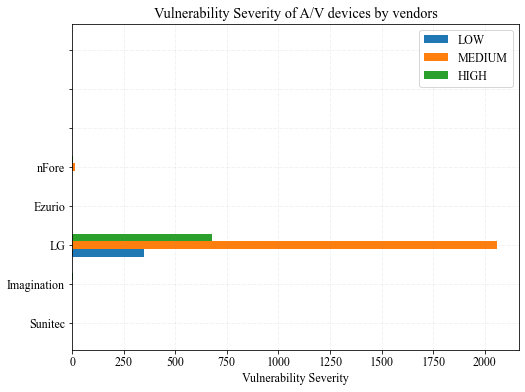

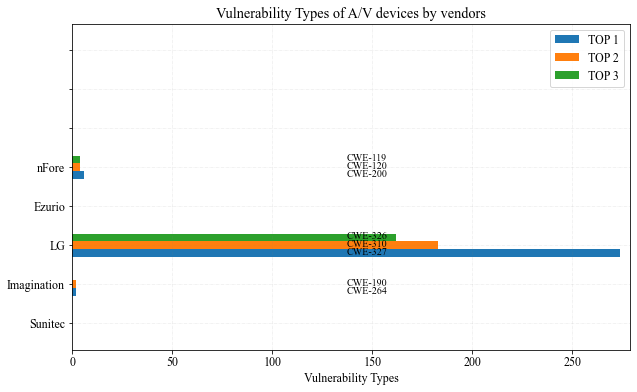

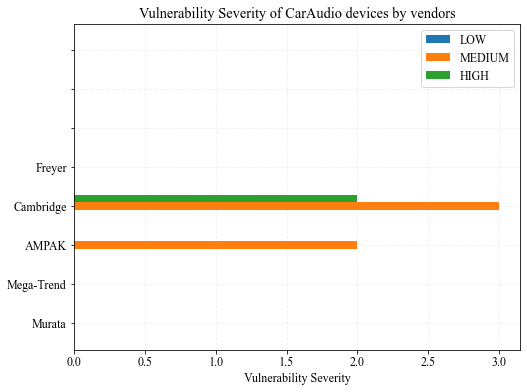

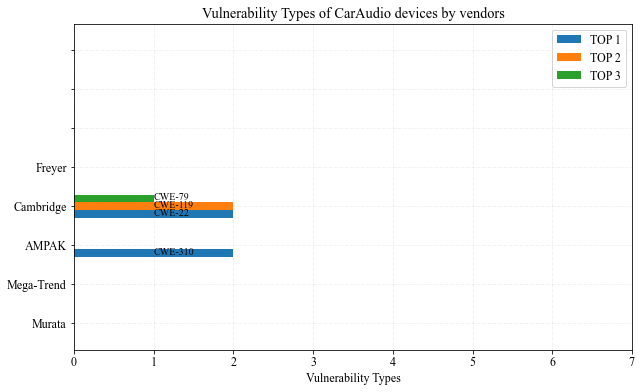

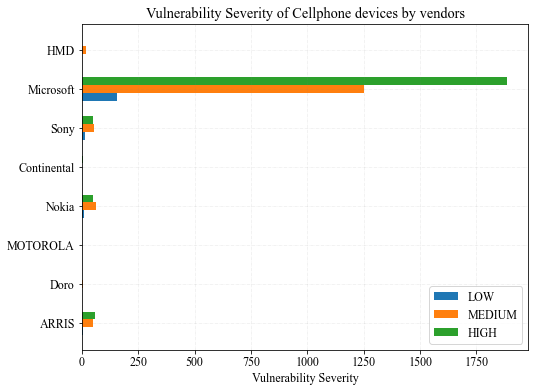

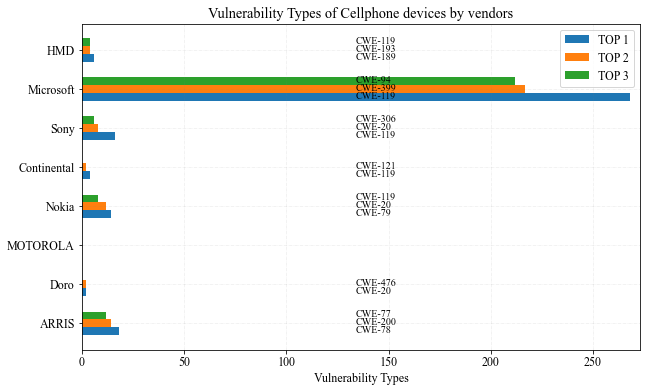

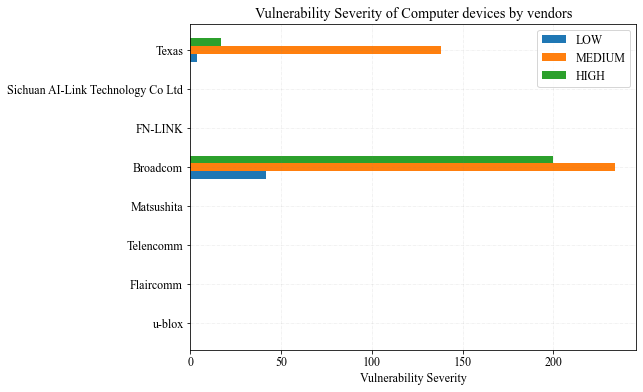

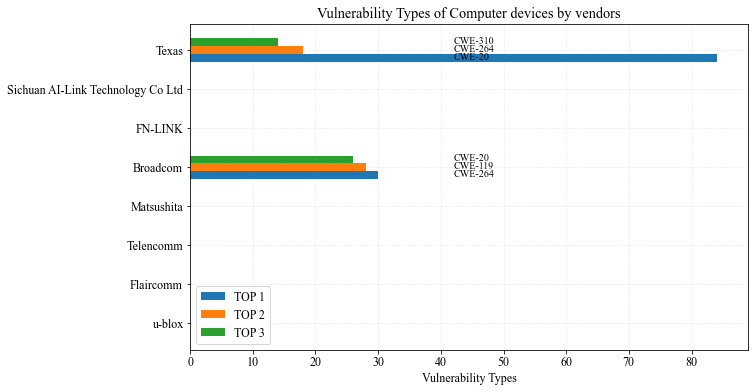

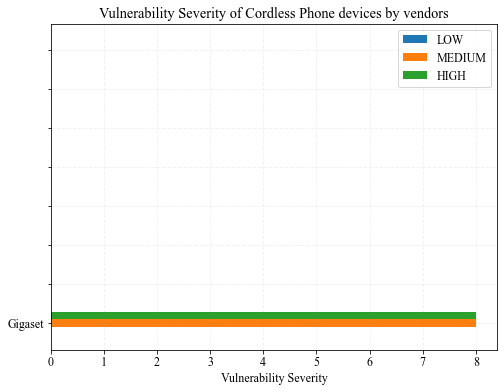

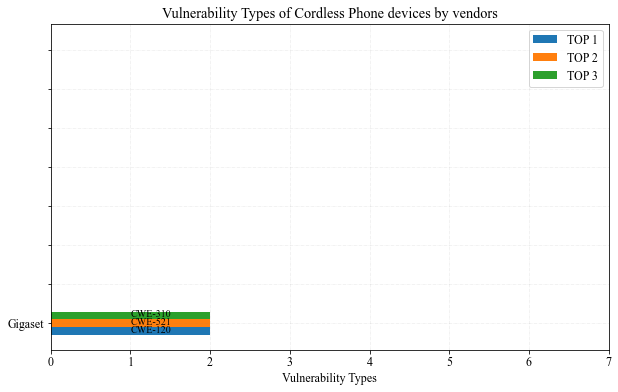

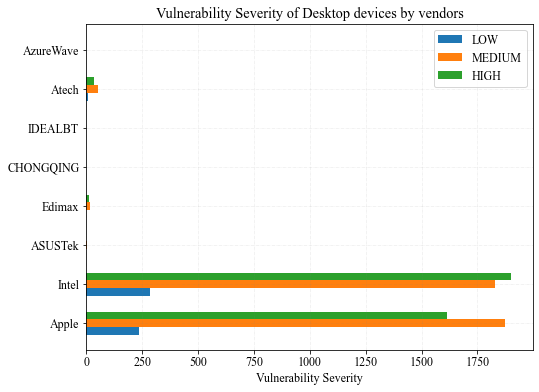

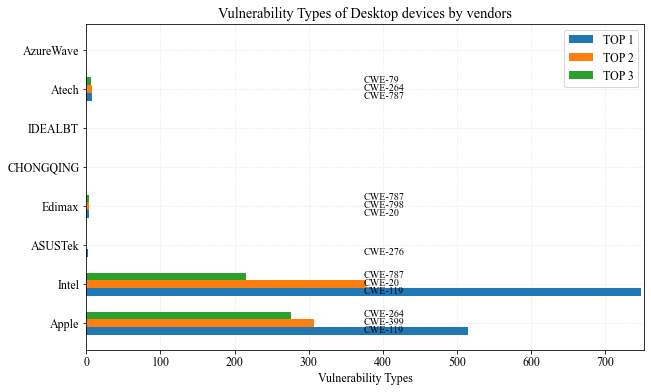

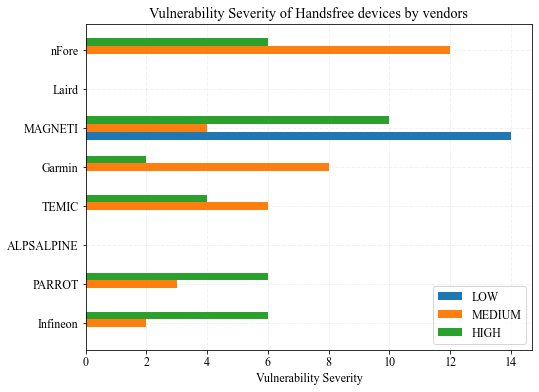

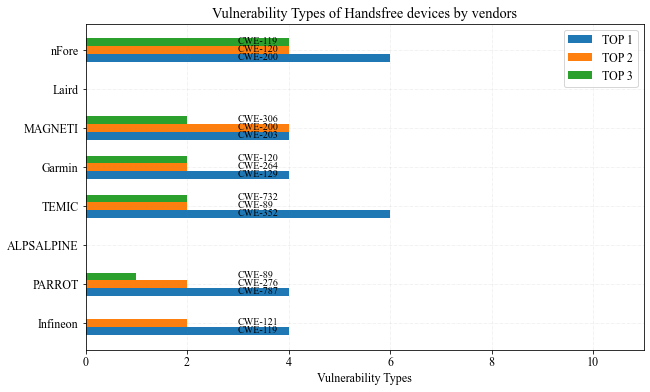

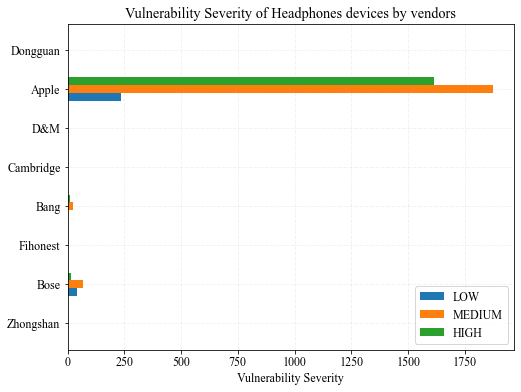

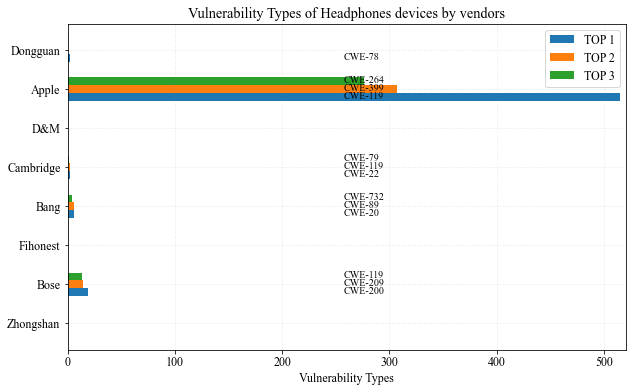

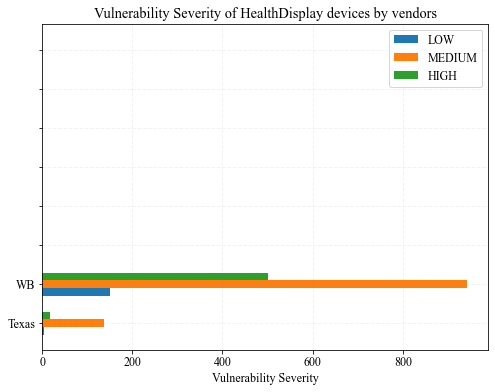

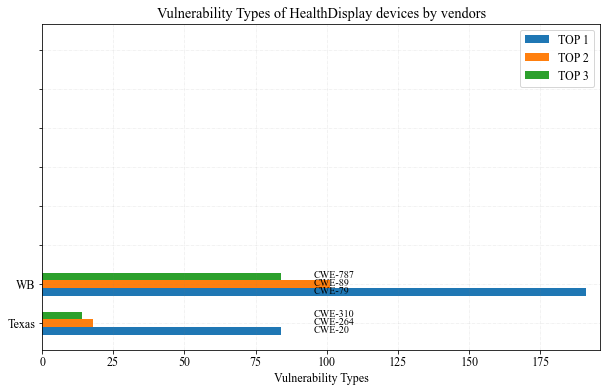

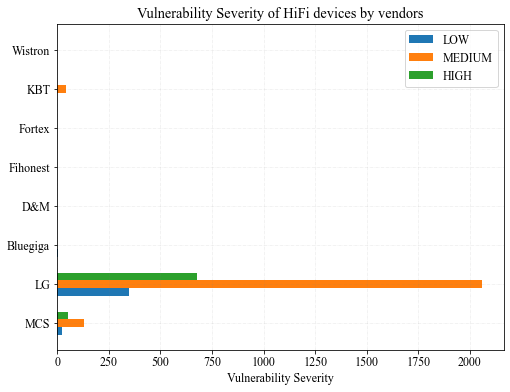

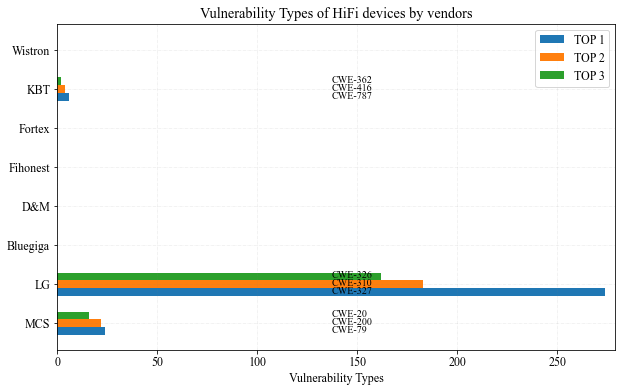

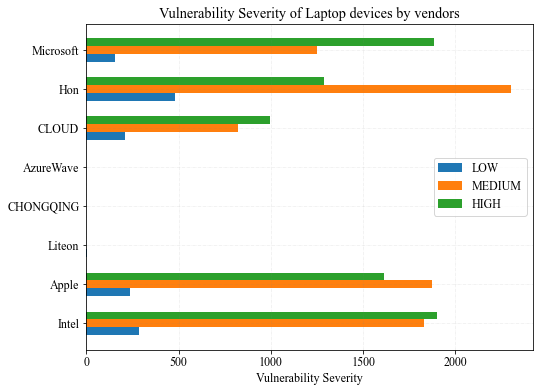

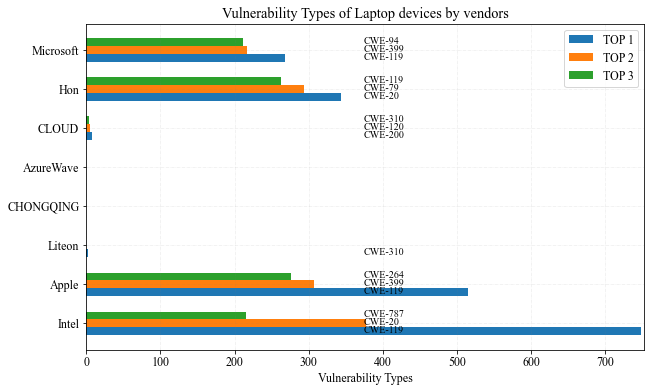

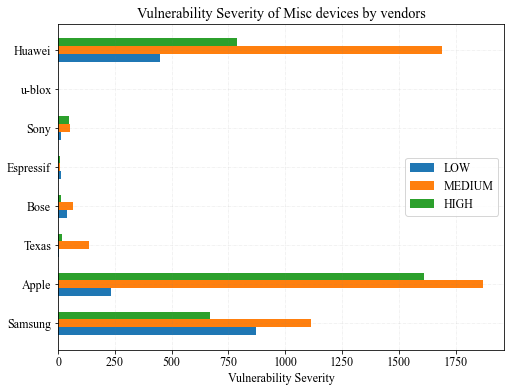

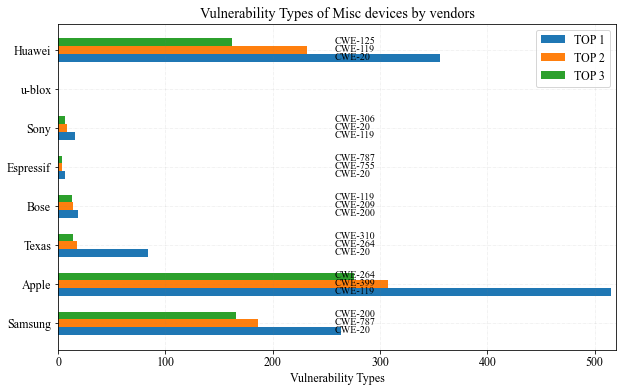

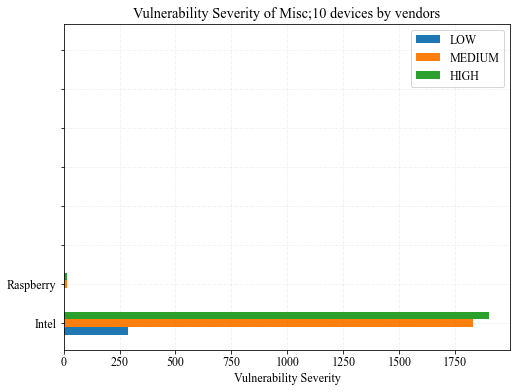

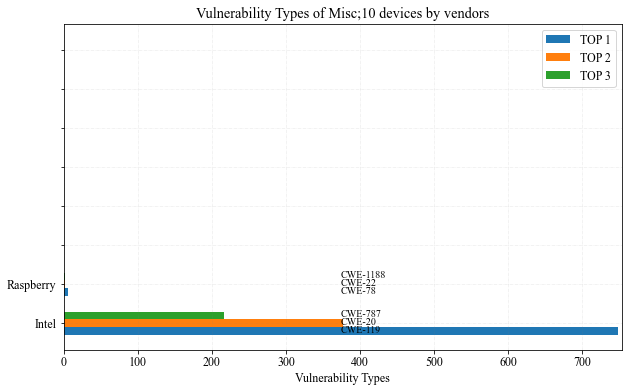

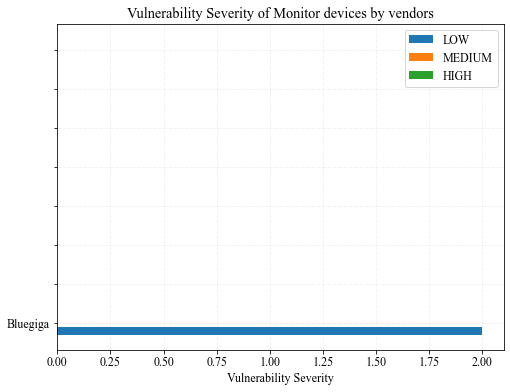

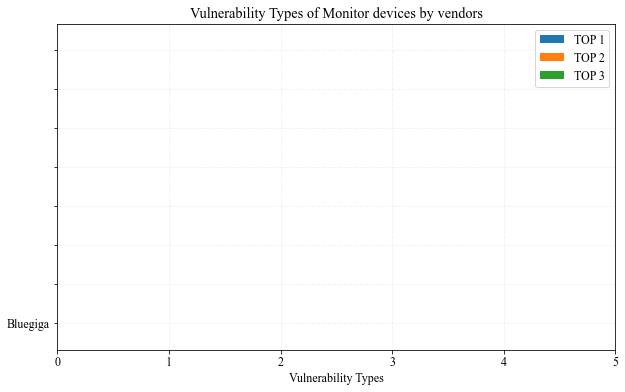

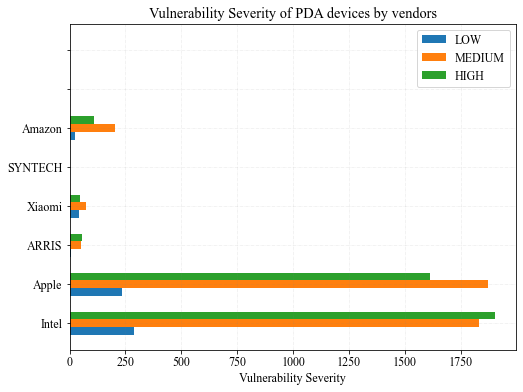

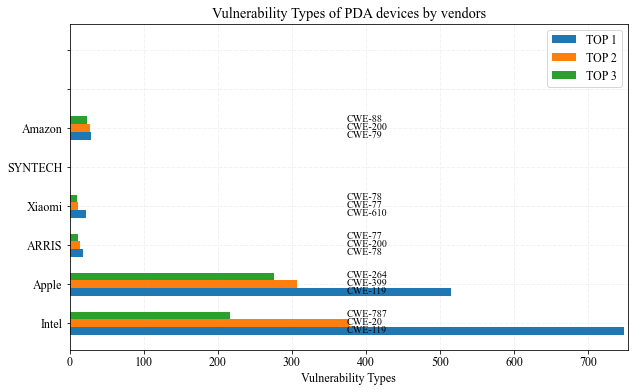

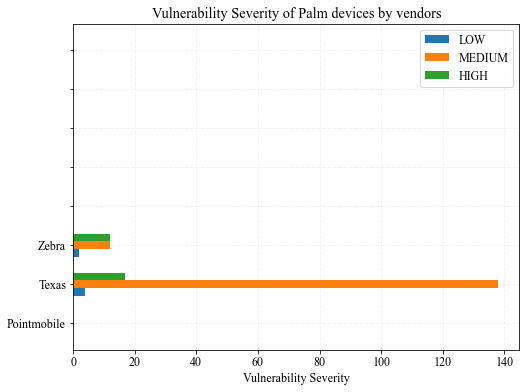

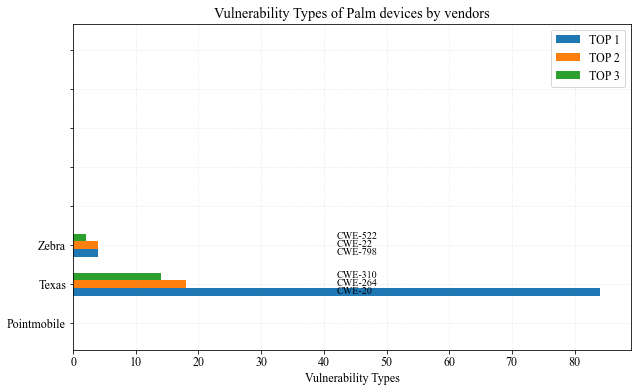

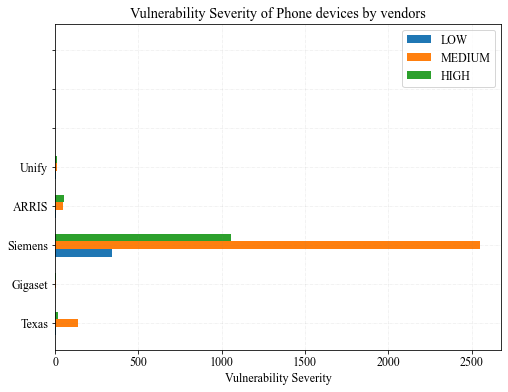

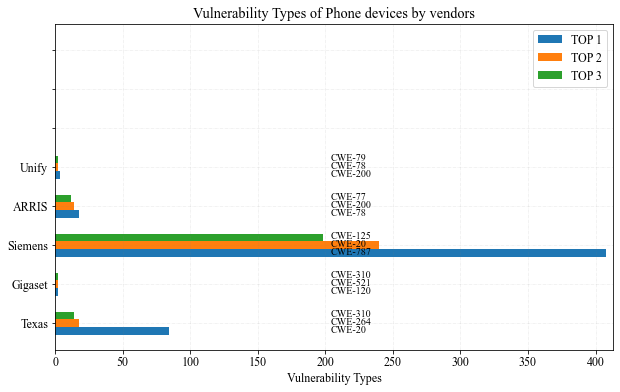

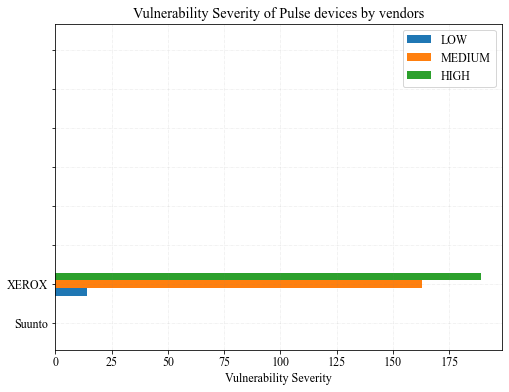

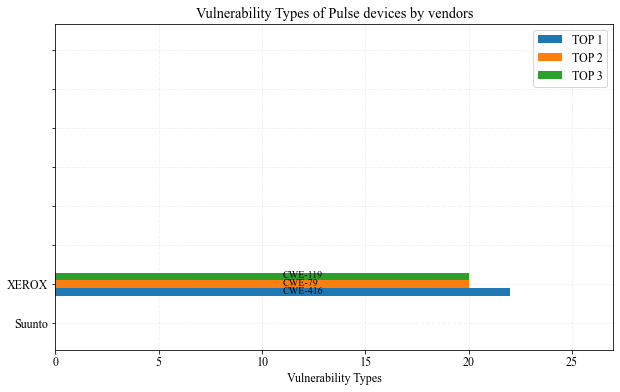

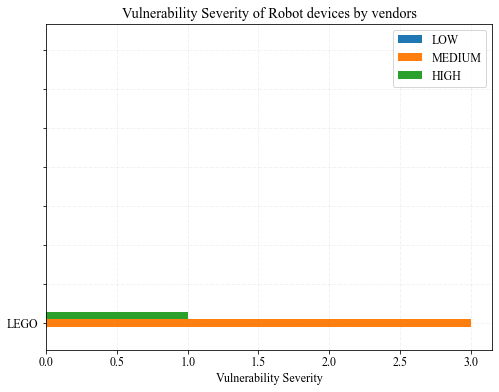

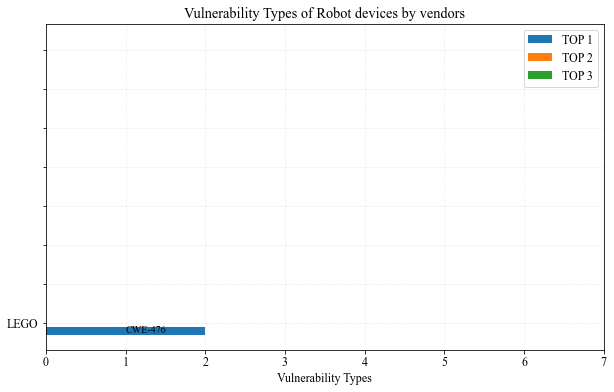

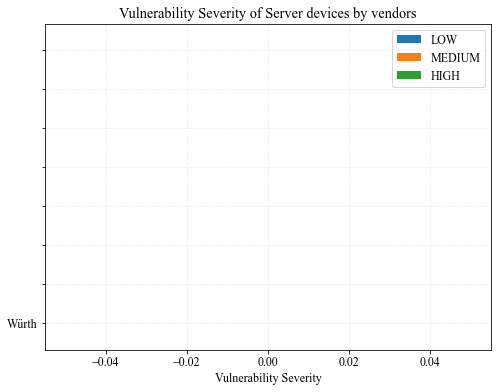

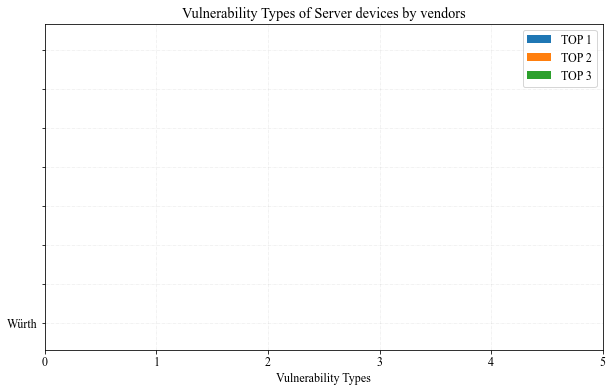

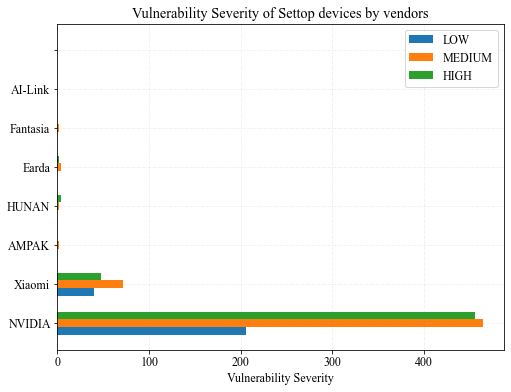

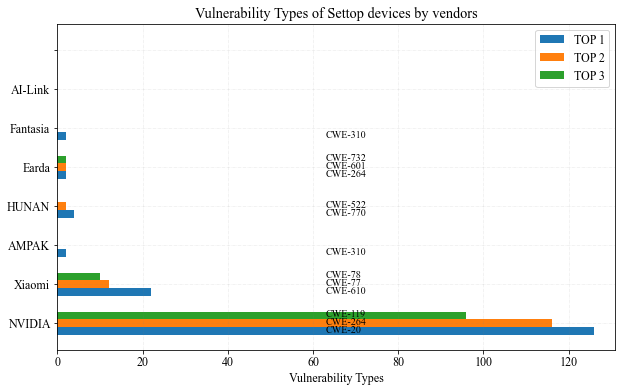

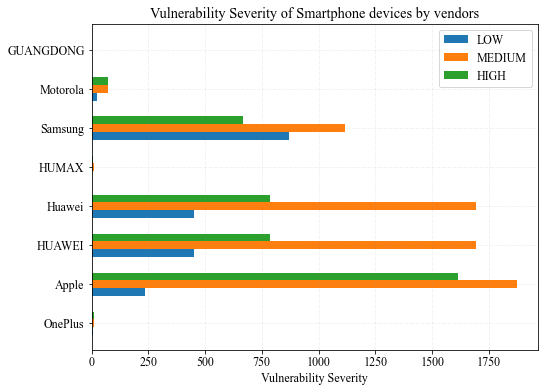

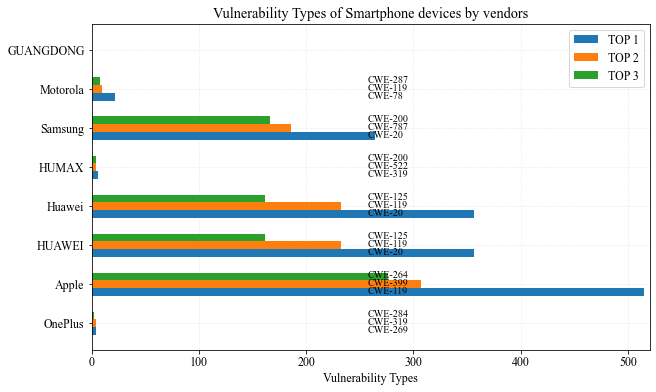

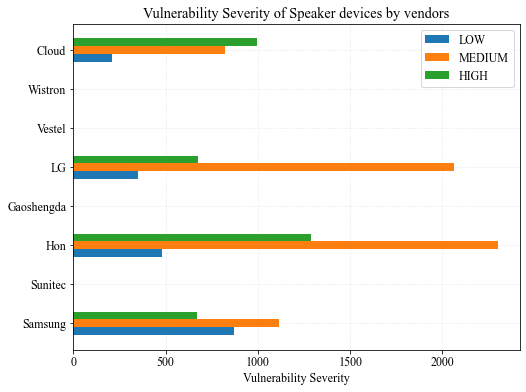

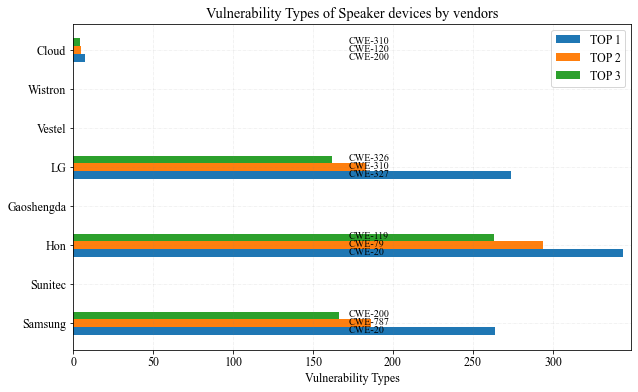

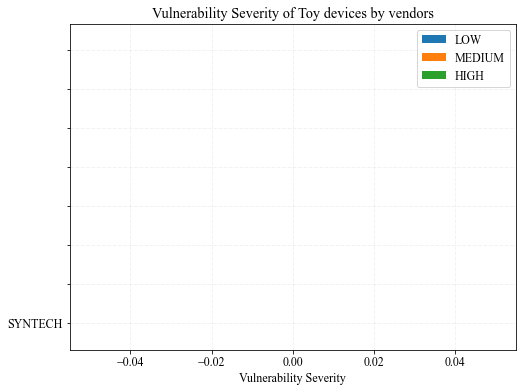

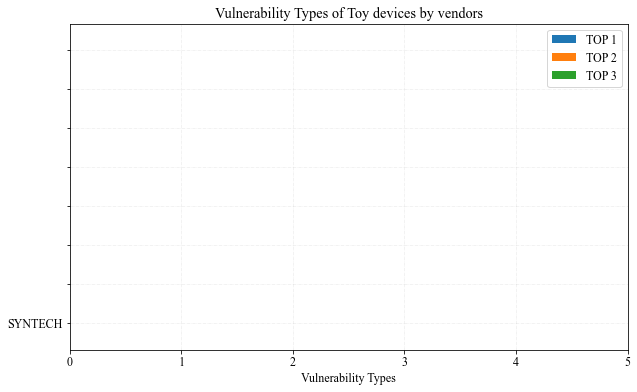

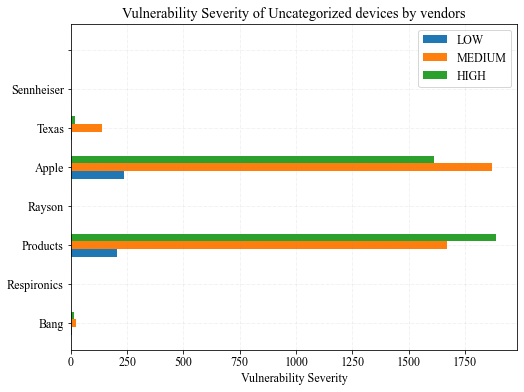

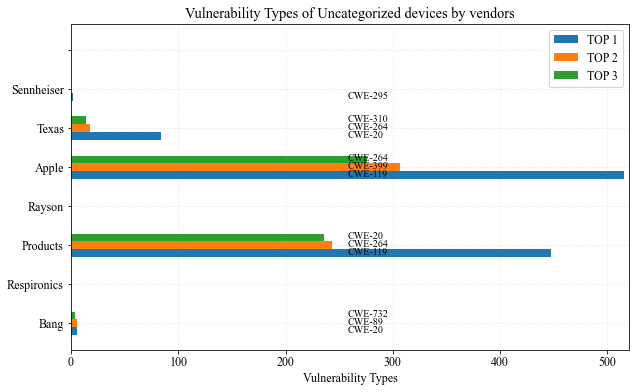

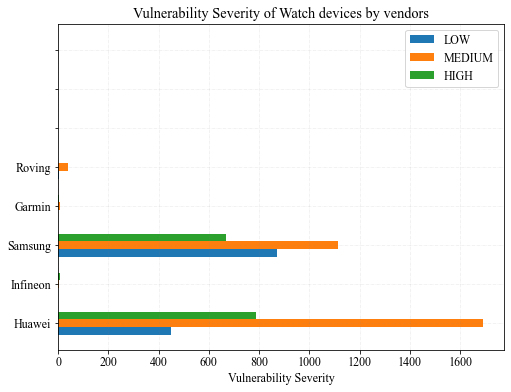

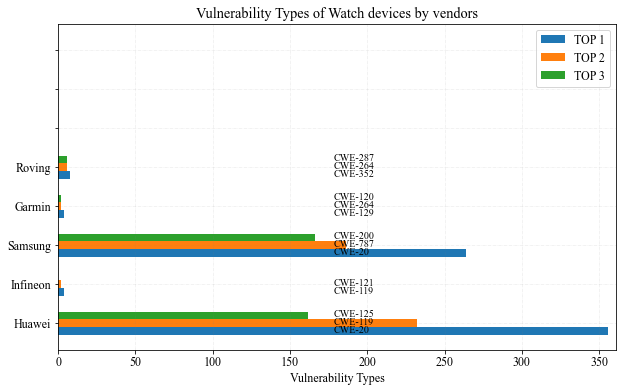

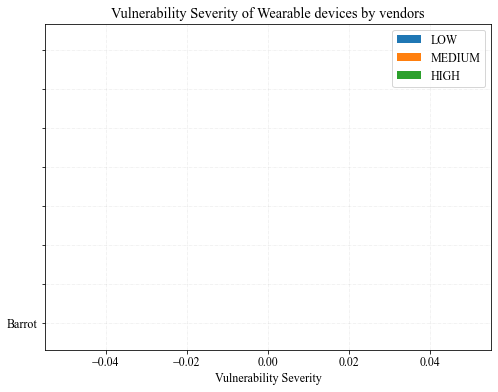

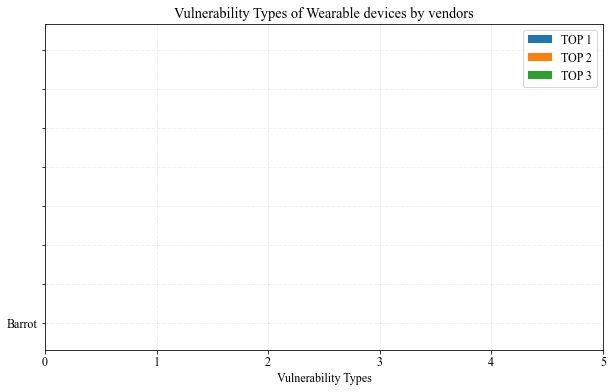

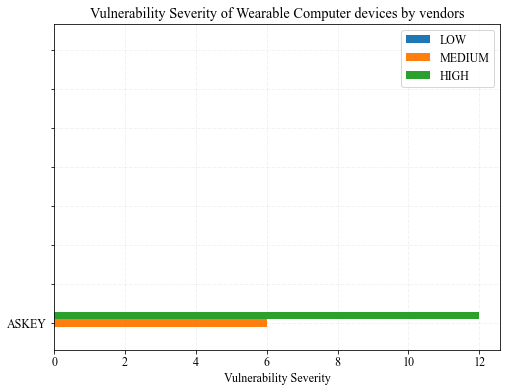

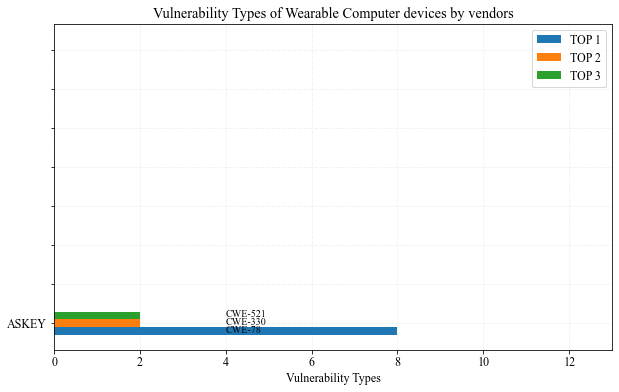

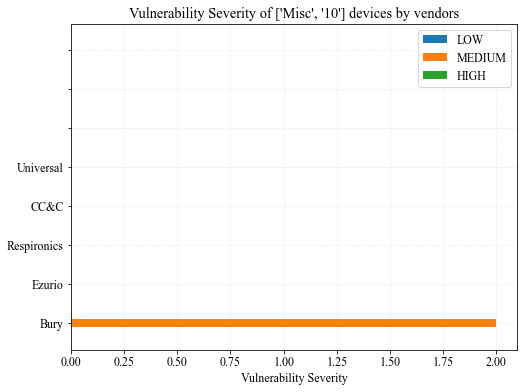

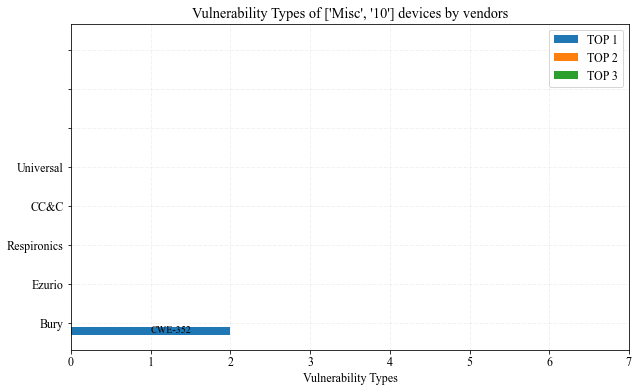

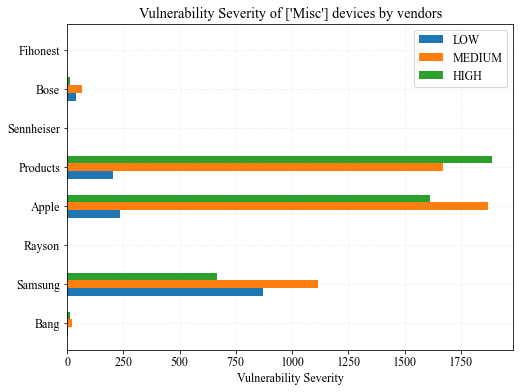

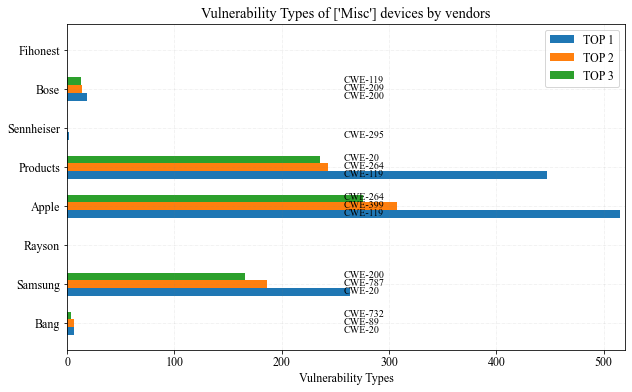

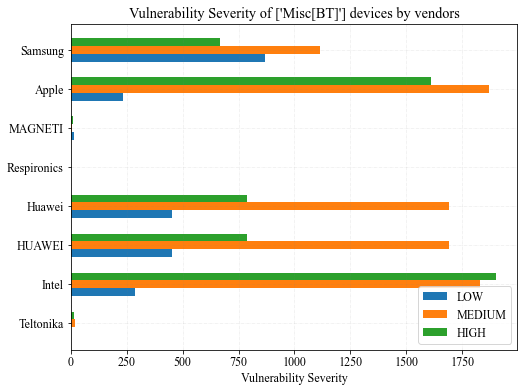

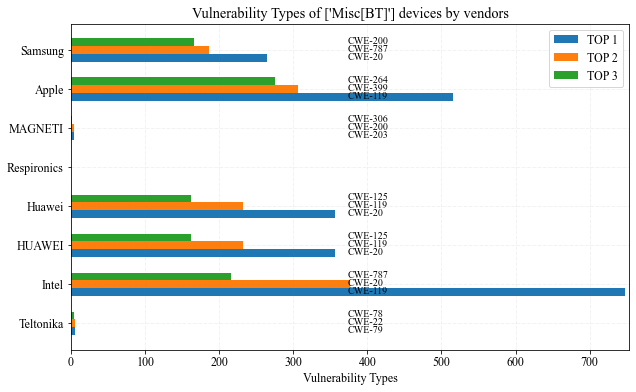

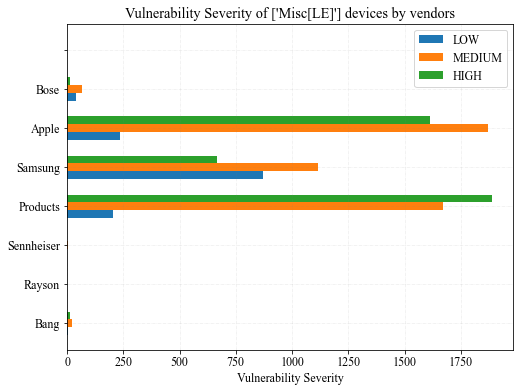

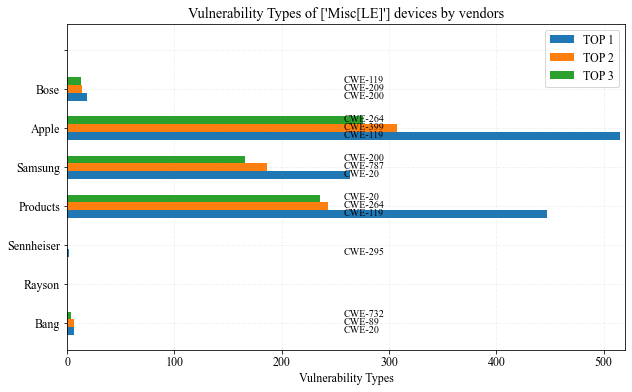

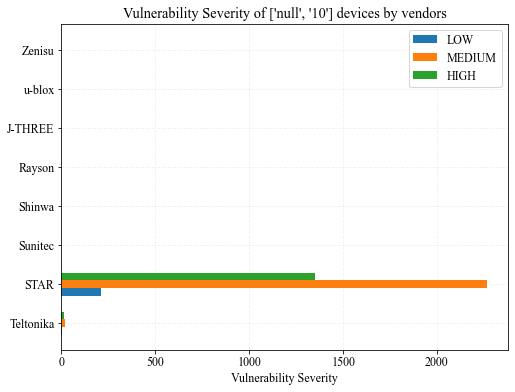

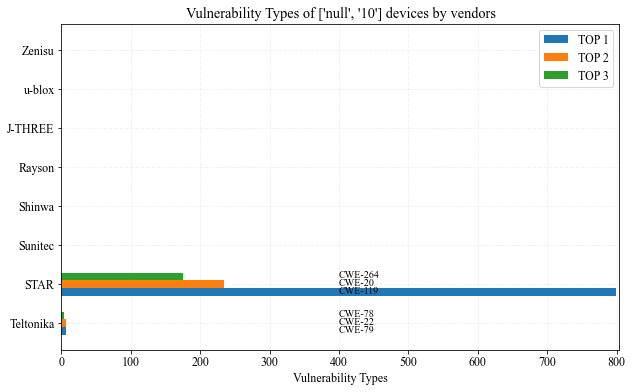

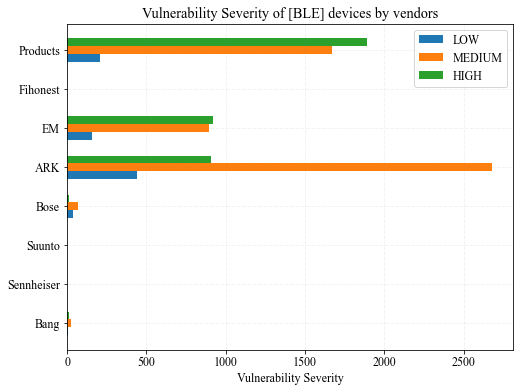

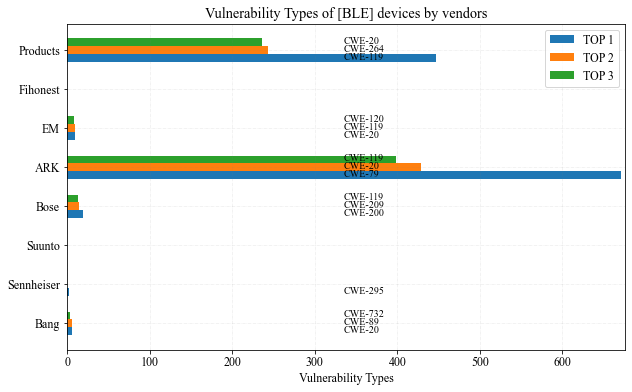

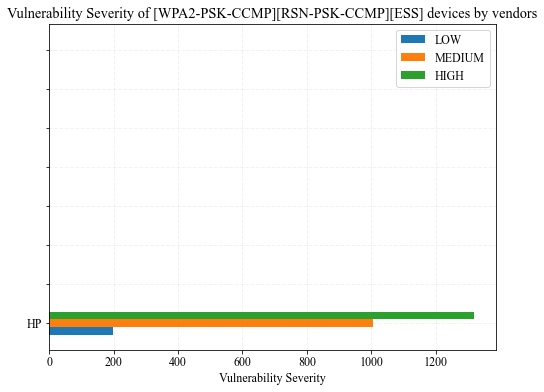

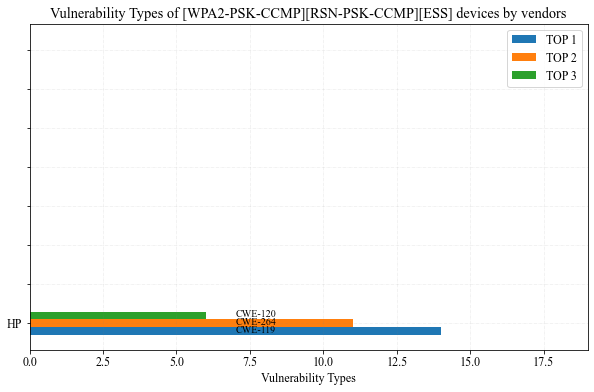

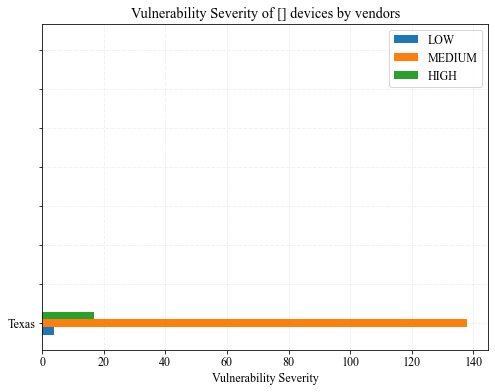

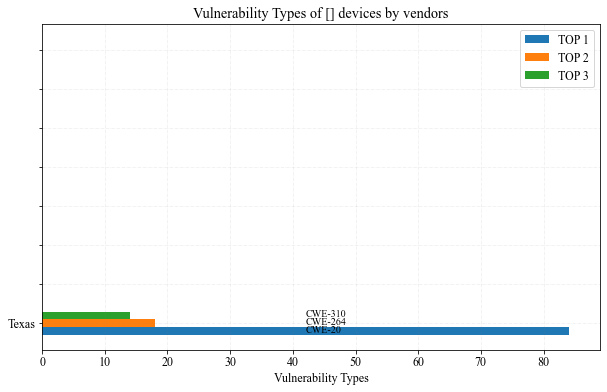

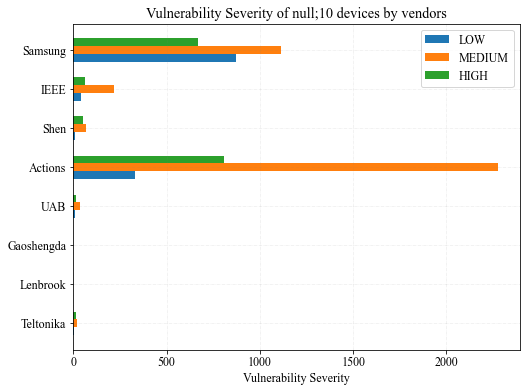

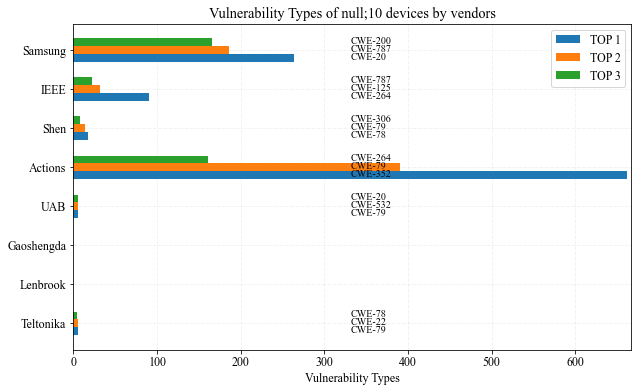

['Teltonika', 'Lenbrook', 'Gaoshengda', 'UAB', 'Actions', 'Shen', 'IEEE', 'Samsung']
[2, 0, 0, 8, 331, 10, 40, 870]
[18, 0, 0, 38, 2280, 67, 216, 1114]
[14, 0, 0, 12, 808, 53, 60, 668]
[6, 0, 0, 6, 662, 18, 90, 264]
['CWE-79', '', '', 'CWE-79', 'CWE-352', 'CWE-78', 'CWE-264', 'CWE-20']


In [195]:
cvemap={}
with opne(PATH_MAP,'r') as f:
    json(cvemap,f)
for types in capa_cve.keys():
    y_vendor_name=[]
    x_medium=[]
    x_low=[]
    x_high=[]
    
    x_num_total=[[],[]] #name,num
    x_num_type1=[[],[]] #name,num
    x_num_type2=[[],[]]
    x_num_type3=[[],[]]
    
    x_num=[] # number of every types of vulnerabilities
    vendor_dict=capa_cve[types]
    for vendor in vendor_dict.keys():
        vul_types=vendor_dict[vendor]['description_value'].unique()
        y_vendor_name.append(vendor)
        if vendor_dict[vendor].empty:
            x_medium.append(0)
            x_low.append(0)
            x_high.append(0)
            
            x_num.append(0)
            x_num_type1[0].append(0)
            x_num_type1[1].append("")
            x_num_type2[0].append(0)
            x_num_type2[1].append("")
            x_num_type3[0].append(0)
            x_num_type3[1].append("")
        else:
            x_medium.append((vendor_dict[vendor]['baseSeverity']=="MEDIUM").sum())
            x_low.append((vendor_dict[vendor]['baseSeverity']=="LOW").sum())
            x_high.append((vendor_dict[vendor]['baseSeverity']=="HIGH").sum())
            
            value_counts=vendor_dict[vendor][vendor_dict[vendor].isin(['NVD-CWE-Other','NVD-CWE-noinfo'])==False]['description_value'].value_counts()
            top_3_values = value_counts.head(3)
            #print("befor",x_num_type1) 
            if len(top_3_values.values)>0:
                x_num_type1[0].append(top_3_values.values[0])
                x_num_type1[1].append(str(top_3_values.index[0]))
            else:
                x_num_type1[0].append(0)
                x_num_type1[1].append("")
            if len(top_3_values.values)>1:
                x_num_type2[0].append(top_3_values.values[1])
                x_num_type2[1].append(str(top_3_values.index[1]))
            else:
                x_num_type2[0].append(0)
                x_num_type2[1].append("")
            if len(top_3_values.values)>2:
                x_num_type3[0].append(top_3_values.values[2])
                x_num_type3[1].append(str(top_3_values.index[2]))
            else:
                x_num_type3[0].append(0)
                x_num_type3[1].append("")
            #print("after",x_num_type1)      
    for i in range(8-len(y_vendor_name)):
        y_vendor_name.append("")
        x_medium.append(0)
        x_low.append(0)
        x_high.append(0)
        x_num.append(0)
        x_num_type1[0].append(0)
        x_num_type1[1].append("")
        x_num_type2[0].append(0)
        x_num_type2[1].append("")
        x_num_type3[0].append(0)
        x_num_type3[1].append("")
    
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_yticks(np.arange(len(y_vendor_name)))
    ax1.set_yticklabels(y_vendor_name) #, fontdict={'fontname': 'Times New Roman'}
    bar_height = 0.2
    bar1 = ax1.barh(np.arange(len(y_vendor_name))-bar_height, x_low, height=bar_height, label='LOW')
    bar2 = ax1.barh(np.arange(len(y_vendor_name)), x_medium, height=bar_height, label='MEDIUM')
    bar3 = ax1.barh(np.arange(len(y_vendor_name))+bar_height, x_high, height=bar_height, label='HIGH')
    
    ax1.grid(b=True, color='grey',linestyle='-.', linewidth=0.5,alpha=0.2)
    ax1.legend()
    ax1.set_xlabel('Vulnerability Severity')
    ax1.set_title('Vulnerability Severity of {} devices by vendors'.format(types))
    
    plt.show()
    # ---------------- weakness types ----------------
    fig, ax2 = plt.subplots(figsize=(10, 6))
    ax2.set_yticks(np.arange(len(y_vendor_name)))
    ax2.set_yticklabels(y_vendor_name) #, fontdict={'fontname': 'Times New Roman'}
    bar_height = 0.2
    
    bar1 = ax2.barh(np.arange(len(y_vendor_name))-bar_height, x_num_type1[0], height=bar_height, label='TOP 1')
    bar2 = ax2.barh(np.arange(len(y_vendor_name)), x_num_type2[0], height=bar_height, label='TOP 2')
    bar3 = ax2.barh(np.arange(len(y_vendor_name))+bar_height, x_num_type3[0], height=bar_height, label='TOP 3')
    
    ax2.grid(b=True, color='grey',linestyle='-.', linewidth=0.5,alpha=0.2)
    ax2.legend()
    ax2.set_xlabel('Vulnerability Types')
    ax2.set_title('Vulnerability Types of {} devices by vendors'.format(types))
    max_xlim=max(max(x_num_type1[0]),max(x_num_type2[0]),max(x_num_type3[0]))
    for i, v in enumerate(x_num_type1[1]):
        ax2.text(max_xlim/2, i - 0.15, cvemap[v], color='black', fontsize=10, ha='left', va='center')
    for i, v in enumerate(x_num_type2[1]):
        ax2.text(max_xlim/2, i + 0.05, cvemap[v], color='black', fontsize=10, ha='left', va='center')
    for i, v in enumerate(x_num_type3[1]):
        ax2.text(max_xlim/2 , i + 0.25, cvemap[v], color='black', fontsize=10, ha='left', va='center')
    ax2.set_xlim([0, max(x_num_type1[0])+5])
    plt.show()
    
print(y_vendor_name)
print(x_low)
print(x_medium)
print(x_high)
print(x_num_type1[0])
print(x_num_type1[1])


In [125]:
con.close()

# Overview-total vulnerabilities statistic-severity, types, status

[118, 357, 341]


KeyError: 'vulnStatus'

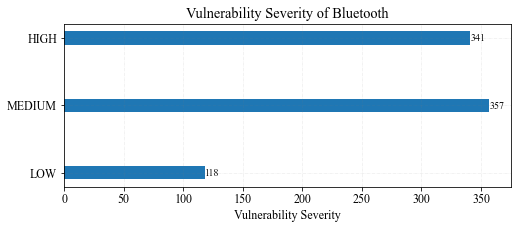

In [42]:
#------------severity-----------
y=["LOW","MEDIUM","HIGH"]
x_type=[]
for yy in y:
    x_type.append((overview['baseSeverity']==yy).sum())
print(x_type)
fig, ax = plt.subplots(figsize=(8, 3))
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y) #, fontdict={'fontname': 'Times New Roman'}
bar_height = 0.2
bar = ax.barh(np.arange(len(y)), x_type, height=bar_height, label='LOW')
    
ax.grid(b=True, color='grey',linestyle='-.', linewidth=0.5,alpha=0.2)
# ax.legend()
ax.set_xlabel('Vulnerability Severity')
ax.set_title('Vulnerability Severity of Bluetooth')
for i, v in enumerate(x_type):
    ax.text(v, i, v, color='black', fontsize=10, ha='left', va='center')
    
#------------type-----------
y_value_counts=overview.value_counts()
#top_3_values = value_counts.head(3)
y=y_value_counts.values
x_type=y_value_counts['vulnStatus'].index
fig, ax = plt.subplots(figsize=(8, 3))
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y) #, fontdict={'fontname': 'Times New Roman'}
bar_height = 0.2
print(np.arange(len(y)))
print(x_type)
bar = ax.barh(np.arange(len(y)), x_type, height=bar_height, label='LOW')
    
ax.grid(b=True, color='grey',linestyle='-.', linewidth=0.5,alpha=0.2)
# ax.legend()
ax.set_xlabel('Vulnerability Severity')
ax.set_title('Vulnerability Severity of Bluetooth')
for i, v in enumerate(x_type):
    ax.text(v, i, v, color='black', fontsize=10, ha='left', va='center')

#------------status-----------
from datetime import datetime
now = datetime.now()
formatted_date = now.strftime("%Y-%m-%d %H:%M:%S")
# Print the formatted date and time
print("Formatted date and time:", formatted_date)

status={'Received':0,'Awaiting Analysis':0,'Analysis':0,'Undergoing Analysis':0,'Analyzed':0,'Modified':0,'Deferred':0,'Rejected':0}
y=status.keys()
x_status=[]
for sta in stauts:
    x_status.append((overview['vul_state']==sta).sum())
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(np.arange(len(y)))
ax.set_yticklabels(y) #, fontdict={'fontname': 'Times New Roman'}
bar_height = 0.2
bar = ax.barh(np.arange(len(y)), x_status, height=bar_height, label='LOW')
    
ax.grid(b=True, color='grey',linestyle='-.', linewidth=0.5,alpha=0.2)
# ax.legend()
ax.set_xlabel('Vulnerability Status')
ax.set_title('Vulnerability Severity of Bluetooth')
for i, v in enumerate(x_status[1]):
    ax.text(v, i - 0.15, v, color='black', fontsize=10, ha='left', va='center')    
    